# sierraleone_eda.ipynb

In [2]:
import pandas as pd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
sns.set(style="whitegrid")

# Load all datasets

In [4]:
togo = pd.read_csv("../data/togo-dapaong_qc.csv", parse_dates=["Timestamp"])

# Quick look

In [ ]:
print("Togo:", togo.shape)

Sierraleone: (525600, 19)


# Preview

In [6]:
togo.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


# Basic info

In [7]:
togo.head()
togo.info()
display(togo.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-25 12:00:30.000000768,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
min,2021-10-25 00:01:00,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,2022-01-24 06:00:45,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2022-04-25 12:00:30,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,2022-07-25 18:00:15,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,2022-10-25 00:00:00,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN
std,NaN,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN


# Check for missing values

In [8]:
# ensure df is defined (use the loaded 'togo' dataframe if not)
if 'df' not in globals():
	df = togo.copy()

miss = df.isna().mean().sort_values(ascending=False)
print("Columns with >5% missing:")
print(miss[miss > 0.05])

Columns with >5% missing:
Comments    1.0
dtype: float64


# date/time indices

In [9]:
df = df.sort_values("Timestamp")
df = df.set_index("Timestamp")

# Z-score outlier flagging for key columns

In [10]:
cols = ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"]
z = np.abs(stats.zscore(df[cols].fillna(df[cols].median())))
z_df = pd.DataFrame(z, index=df.index, columns=cols)
outlier_mask = (z_df > 3).any(axis=1)
print(f"Outliers flagged: {outlier_mask.sum()} rows")

Outliers flagged: 9251 rows


# flag rows and inspect

In [11]:
df["outlier"] = outlier_mask
df_outliers = df[df["outlier"]]
df_outliers.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,outlier
Timestamp,,,,,,,,,,,,,,,,,,,
2021-10-28 11:06:00,1139.0,805.1,466.1,1172.0,1154.0,29.8,70.8,2.2,2.6,0.4,298.6,13.4,977,0,0.0,44.7,50.2,NaN,True
2021-10-28 18:11:00,-1.2,0.0,0.0,0.0,0.0,29.7,63.5,6.6,9.7,1.6,122.1,14.3,976,0,0.0,30.0,29.5,NaN,True
2021-10-28 18:12:00,-1.0,0.0,0.0,0.0,0.0,29.3,62.4,6.9,8.9,1.2,128.7,10.8,976,0,0.0,29.9,29.5,NaN,True
2021-10-28 18:14:00,-0.8,0.0,0.0,0.0,0.0,28.6,63.7,7.1,8.9,1.1,127.9,14.4,976,0,0.0,29.5,29.2,NaN,True
2021-10-28 18:21:00,-1.3,0.0,0.0,0.0,0.0,27.7,64.5,6.1,8.9,1.3,123.2,14.4,977,0,0.0,28.4,28.2,NaN,True


# Impute missing in key columns (median)

In [13]:
for c in cols:
    if df[c].isna().sum() > 0:
        df[c] = df[c].fillna(df[c].median())

# cleaning

In [14]:
def clean_solar_data(df):
    # Keep only relevant columns
    df = df[["Timestamp", "GHI", "DNI", "DHI"]]
    
    # Remove negative or impossible values
    for col in ["GHI", "DNI", "DHI"]:
        df[col] = df[col].apply(lambda x: x if x >= 0 else np.nan)
    
    # Optionally fill missing values with interpolation
    df = df.interpolate()
    
    return df

# use the already-loaded dataframe 'togo' instead of undefined 'ben_raw'
ben = clean_solar_data(togo)

C:\Users\mulat\AppData\Local\Temp\ipykernel_12336\2943762599.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: x if x >= 0 else np.nan)


# Save cleaned file

In [15]:
# import os

# # ensure output directory exists
# os.makedirs("data", exist_ok=True)

# save cleaned dataframe (reset index to include Timestamp column)
df.reset_index().to_csv("data/togo_clean.csv", index=False)

# Time series plots - daily mean

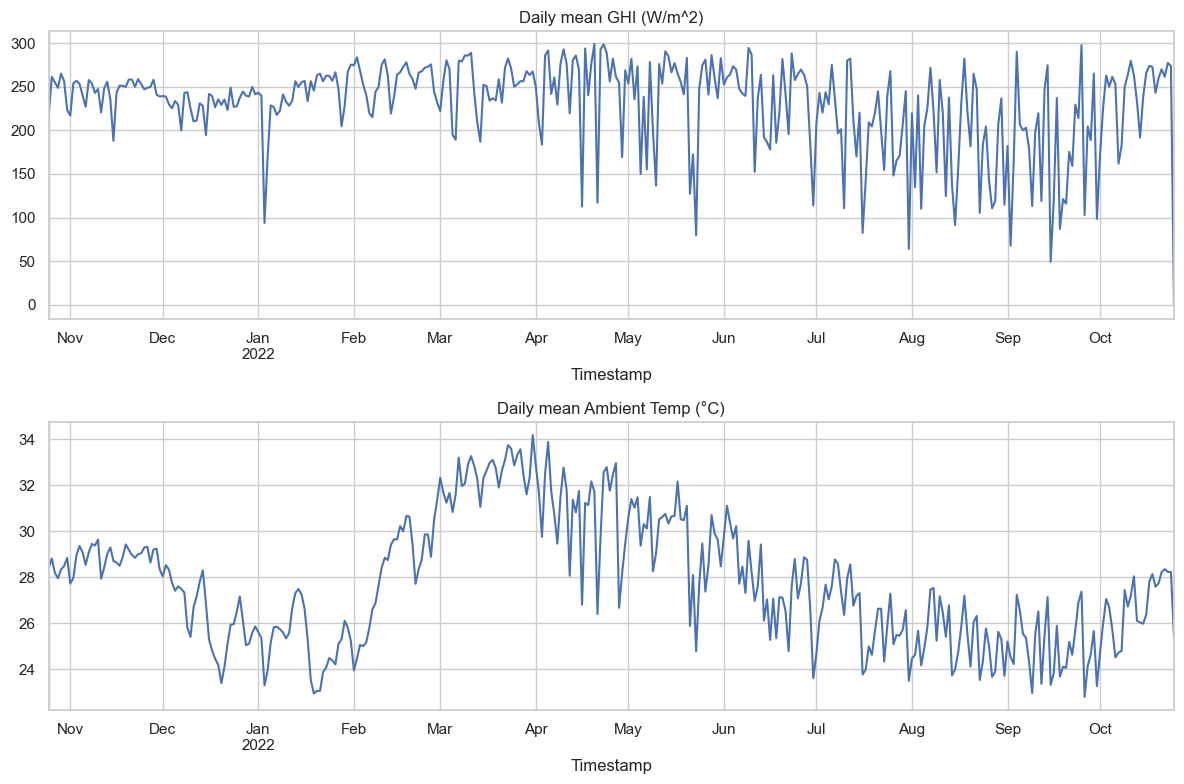

In [16]:
daily = df.resample("D").mean()
fig, ax = plt.subplots(2,1, figsize=(12,8))
daily["GHI"].plot(ax=ax[0], title="Daily mean GHI (W/m^2)")
daily["Tamb"].plot(ax=ax[1], title="Daily mean Ambient Temp (°C)")
plt.tight_layout()

# Boxplots per hour-of-day to inspect diurnal pattern

Text(0.5, 1.0, 'GHI by hour of day')

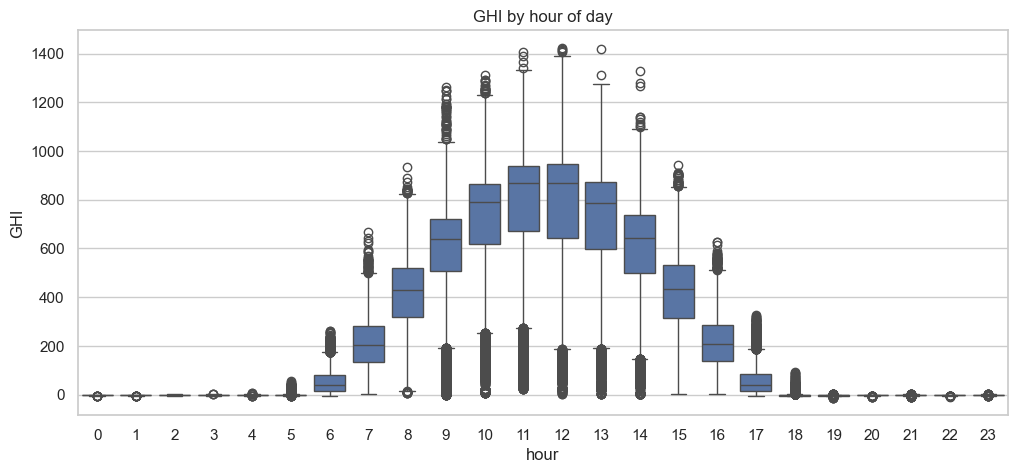

In [17]:
df["hour"] = df.index.hour
plt.figure(figsize=(12,5))
sns.boxplot(x="hour", y="GHI", data=df.reset_index())
plt.title("GHI by hour of day")

# Cleaning impact: group by Cleaning flag

,Cleaning,ModA,ModB
0,0,225.979064,219.401351
1,1,535.186477,532.211744


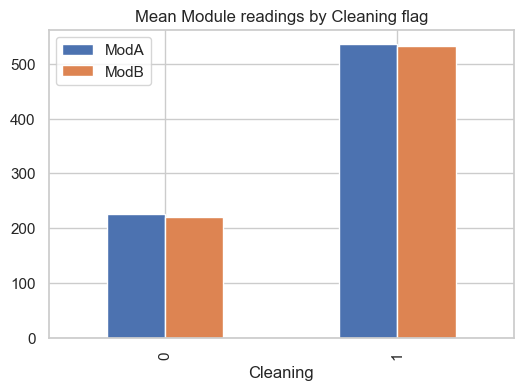

In [18]:
if "Cleaning" in df.columns:
    tmp = df.reset_index().groupby("Cleaning")[["ModA","ModB"]].mean().reset_index()
    display(tmp)
    tmp.plot(kind="bar", x="Cleaning", figsize=(6,4), title="Mean Module readings by Cleaning flag")

# Correlation heatmap

Text(0.5, 1.0, 'Correlation matrix')

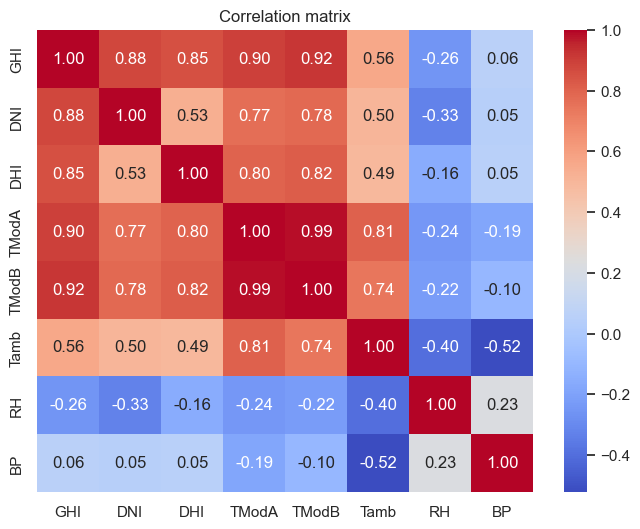

In [19]:
corr_cols = ["GHI","DNI","DHI","TModA","TModB","Tamb","RH","BP"]
plt.figure(figsize=(8,6))
sns.heatmap(df[corr_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation matrix")

# Scatter example: WS vs GHI

Text(0.5, 1.0, 'Wind speed vs GHI')

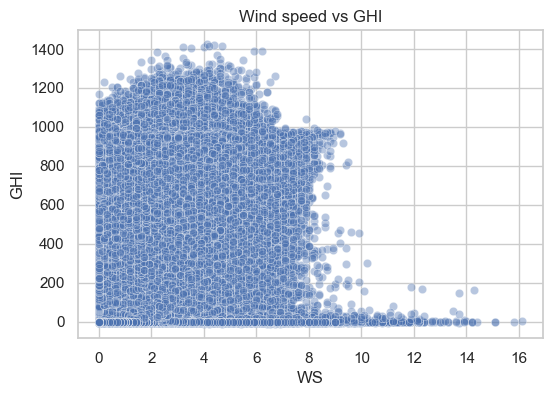

In [20]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="WS", y="GHI", data=df.reset_index(), alpha=0.4)
plt.title("Wind speed vs GHI")